In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data.data import MyDataLoader, DataPreparation

In [5]:
# lookup dict
noise_to_sigma = {
    'low': 0.01,
    'medium': 0.05,
    'high': 0.10,
    'vhigh': 1.00
}
inject_x_image = {'low': 0.01/32, 'medium': 0.05/32, 'high': 0.10/32}
noise = 'high'

In [6]:
data = DataPreparation()
size_df = 1

number of sims 1
NO WERE NOT VARYING SIGMA
linear_homoskedastic simulation data generated,                 with noise injected type: predictive.
number of sims 1
YES WERE VARYING SIGMA
linear_homoskedastic simulation data generated,                 with noise injected type: feature.


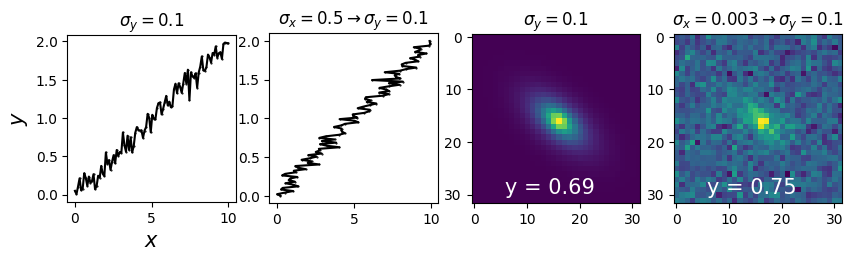

In [19]:
fig = plt.figure(figsize=(10,4))

data.params = np.array([[ 0.2, 0]])


ax1 = fig.add_subplot(141)
data.simulate_data(data.params,
                   noise_to_sigma[noise], 
                   simulation_name = 'linear_homoskedastic',
                   x=np.linspace(0, 10, 100),
                   inject_type = 'predictive'
                   )
ax1.plot(np.array(data.input), np.array(data.output).flatten(), color = 'black')
ax1.scatter(np.array(data.input), np.array(data.output), color = 'black', s=0.25, zorder=-100)
ax1.set_title(r'$\sigma_y = $'+str(noise_to_sigma[noise]))
ax1.set_xlabel(r'$x$', size=15)
ax1.set_ylabel(r'$y$', size=15, rotation=90)
ax1.set_aspect(5, adjustable='box')


ax0 = fig.add_subplot(142)
data.simulate_data(data.params,
                   noise, 
                   simulation_name = 'linear_homoskedastic',
                   x=np.linspace(0, 10, 100),
                   inject_type = 'feature',
                   vary_sigma = True
                   )
ax0.plot(np.array(data.input).flatten(), np.array(data.output).flatten(), color = 'black')
ax0.scatter(np.array(data.input), np.array(data.output), color = 'black', s=0.25, zorder=-100)
#ax0.set_title('Input injection', size=15)
ax0.set_title(r'$\sigma_x = $'+str(round(noise_to_sigma[noise] / data.params[0][0],3))+
             r'$\rightarrow \sigma_y = $'+str(round(noise_to_sigma[noise],3)))
#ax0.set_xlabel(r'Input, $x$')

ax0.set_aspect(5, adjustable='box')
#ax.set_aspect('equal', adjustable='box')

# now doing 2D
data.params = np.array([[ 0.005,  5,  0.69598183]])
image_size = 32



ax3 = fig.add_subplot(143)

image_p, y_p = data.simulate_data_2d(
    size_df,
    data.params,
    inject_type="predictive",
    sigma=noise_to_sigma[noise]
    )
ax3.imshow(image_p[0])
ax3.annotate('y = ' + str(round(y_p[0], 2)),
             xy=(0.2, 0.05),
             xycoords='axes fraction',
             color='white',
             size=15)
ax3.set_title(r'$\sigma_y = $' + str(noise_to_sigma[noise]))

#ax3.set_title('Output injection', size=15)


ax2 = fig.add_subplot(144)

image_f, y_f = data.simulate_data_2d(
    size_df,
    data.params,
    inject_type="feature",
    sigma=inject_x_image[noise]
    )
ax2.imshow(image_f[0])
ax2.annotate('y = ' + str(round(y_f[0], 2)),
             xy=(0.2, 0.05),
             xycoords='axes fraction',
             color='white',
             size=15)
ax2.set_title(r'$\sigma_x = $' + str(round(noise_to_sigma[noise]/32, 3)) 
             + r'$\rightarrow \sigma_y = $' + str(noise_to_sigma[noise]))

#ax2.set_title('Input uncert', size=15)


#ax1.tick_params(axis='both', which='major', labelsize=14)

#plt.tight_layout()
plt.savefig('../../../Desktop/design_'+str(noise)+'.png', dpi=1000)

In [ ]:
data = DataPreparation()